  # Eight queen puzzle

In the game of chess, the queen is the most powerful piece. It can attack by moving --any-- number of spaces, and in any direction (in its current row, in its column, or diagonally). This allowed movement is shown in the left figure below.

We will solve part of the [Eight queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle). Here, eight queens must be placed on a standard $8 \times 8$ chess board, such that no queen can attack another.

The center figure below shows an invalid solution: two queens can attack each other diagonally. The figure on the right shows a valid solution.

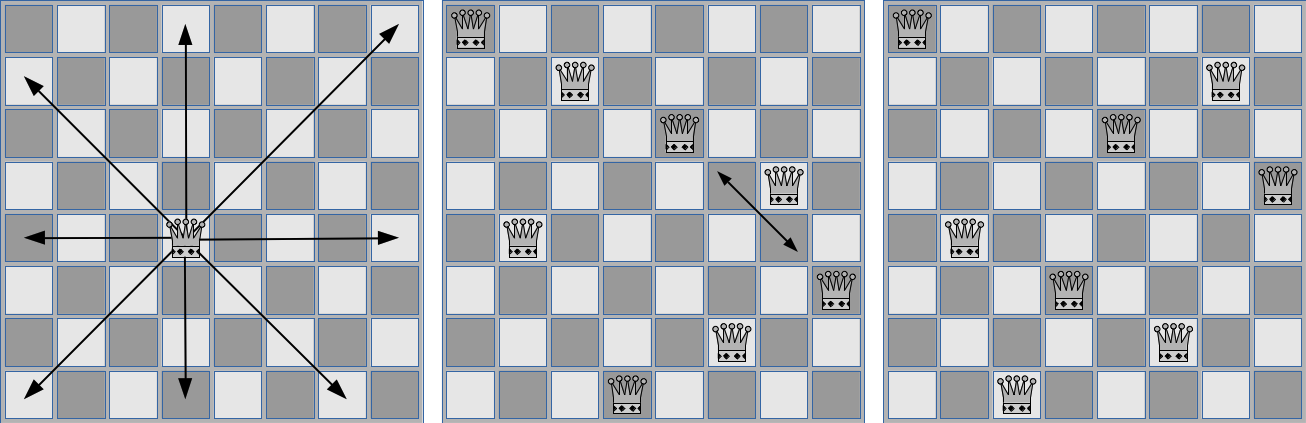

In [2]:
from IPython import display
display.Image("day1_exercise_8queens.png")

## Task

Given a description of a chess board (the locations of the 8 queen pieces), write a function which determines whether or not it represents a valid solution to the eight queens puzzle, returning True or False, respectively.

Number the rows of the board 1-8, and the columns also 1-8.

Clearly, no two queens can share the same column. Therefore, start by assuming there is exactly one queen in each column. The first queen is in column \#1, the second is in column \#2, and so on.

In this case, a configuration to test can be encoded as a list of eight numbers, giving the number of the row for each queen. The function should take such a list as input.

## Hints

* There are two constraints, check if each is valid.
* The first: two queens cannot be on the same row, which is easy to check.
* The second: two queens cannot be on the same diagonal. Note: if two queens are on the same diagonal, the difference between their row numbers equals the difference between their column numbers.

In [4]:
# row numbers
test_1 = [8,4,7,1,6,2,5,3] # center figure above (invalid)
test_2 = [8,4,1,3,6,2,7,5] # right figure above (valid)

# your solution here



Too easy? Write a function which generates new solutions to the eight queens problem.


# Mandelbrot Fractal

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is often used as an introduction to the idea of fractals.

Its formal definition is the set of all complex numbers $c$ for which the function $f(z) = c + z^2$ does not diverge to infinity, when starting from $z=0$. (This "iterative solution" can be computed using a recursive function, or just with a `for` loop for a given number of iterations).

In practice, "diverge to infinity" can be thought of how large $z$ (its magnitude i.e. absolute value) has become after a number of iterations $N$.

## Task A

Write a function `mandel()` which takes as input `z`, `c`, and `N`, and returns the final value of $|f(z)|$.

Test it out with a few different values of $c$.

In [5]:
# your solution here

## Task B

We will visualize the "Mandelbrot fractal" by computing the value of $f(z)$ for a grid of points in the complex plane. While doing so, we will record the "time" (iteration number) when $z$ diverges (becomes large). We will then treat this 2D array of "divergence times" values as an image, and plotting it with `imshow()`.

Write a function `mandelbrot()` which accepts four input parameters: `num_x`, `num_y`, `max_val`, and `N_iter`.

1. Generate `x` coordinates in the range `[-2.5,1.5]` and `y` coordinates in the range `[-1.5,1.5]`, according to the requested number.

2. Use the same `meshgrid()` approach as above to create 2D arrays `xx` and `yy`, of the `x` and `y` coordinate values.

3. Compute `c = x + iy`, which are all the values of $c$ we will evaluate (a 2D array).

4. Create a 2D divergence time array to hold our final answers. 

5. Iterate `N_iter` times and for each, calculate the new value of $z$. For any values whose absolute value are greater than `max_val`, save the current iteration number as the divergence time.

6. Return the divergence time array.

Test out your function with a moderate number of "pixels" in both the `x` and `y` directions (e.g. a few hundred). It should take just a few seconds to run. Note: there should be **no loops**, except for the one for `N_iter`.

Plot the result with `imshow()` - explore different choices for `max_val`, and create a big image!

In [ ]:
# your solution here

# Solving N-Body Gravity

A [N-body simulation](https://en.wikipedia.org/wiki/N-body_simulation) is a numerical calculation of the force of gravity acting on $N$ particles, each with a mass $m$.

The only trouble is: **every particle exerts a gravitational force on every other particle**. As a result the number of force interactions is $N \times (N-1) \simeq N^2$.

Solving this problem "brute force" means computing all of these individual forces, which is why gravity is a classic example of a $\mathcal{O}(N^2)$ computational problem.

Yesterday we have seen the gravitational force law $F = \frac{G~M_1~M_2}{r^2}$ which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

We can rewrite this in terms of the acceleration experienced by particle `i` due to the gravity of all the other particles:

$$ \vec{a}_i = G \sum_{i \ne j}^{N} m_j \frac{\vec{r}_j - \vec{r}_i}{|\vec{r}_j - \vec{r}_i|^3} $$

where $G$ is the gravitational constant. Consider the three-dimensional problem: $\vec{a}$ and $\vec{r}_i$ are 3-vectors, i.e. each has three components for the $x,y,z$ directions.

> Note: The expression $|\vec{r}_j - \vec{r}_i|^3$ is the cube of the 2-norm (or [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm)).

> Note: Instead of the actual value $G = 6.6738 \times 10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$, instead we will take $G = 1$, i.e. we will work in a simpler unit system where G is unity.

## Task A

Write a `Particle` class to represent a single particle. It should be initialized with the mass, position, and velocity of the particle.

Write a method `compute_accel` which accepts as an argument another instance of a Particle class, and computes the acceleration due to the interaction with that particle. The result should be stored as an attribute. (Hint: initialize such an attribute to zero, and add to it each time this method is called).

## Task B

Write a `ParticleSystem` class to represent our collection of particles. It should be initialized with an integer `N` for the requested number of particles, and a float `mass` for the (constant) mass of each particle.

Upon init, it should generate these particles, using a Gaussian "standard normal" distributions (zero mean, variance of one) for both positions and velocities.

The particles (instances of the `Particle` class) should be stored as an attribute of the `ParticleSystem`.

> Note: I suggest to 'shift to the center of mass frame': after creating the particles, subtract the mean velocity of the system (component-wise) from each particle velocity.

# Parallelized $\pi$ Calculation

We will approximate $\pi \simeq 3.1415$ using one of the many series expressions:

$$ \pi = \frac{4}{N} \sum_{i=1}^N \frac{1}{1 + \left(\frac{i-0.5}{N}\right)^2} $$

The accuracy increases as $N$ gets larger.

## Task A

Write a function `series_pi(N)` which computes the above approximation to $\pi$. Run it for values of $N$ spanning several orders of magnitude, and compare the result to `np.pi`, as a function of $N$, with a y-log plot.

## Task B

Use the `multiprocessing` module to create a pool of python workers. Each worker should use `series_pi` to compute a **subset** of the needed terms for the requested $N$, then the results should be combined. Use `map`. Modify the function as needed. Check the performance benefit versus the serial version.

## Task C

Compute the running average ([SMA](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average)), with a time window of one month. Overplot the result.

## Task D

"Technical indicators" are statistics computed on the price of e.g. a stock, or other financial instrument. One example is the [RSI](https://en.wikipedia.org/wiki/Relative_strength_index). Compute it and include it in your plot as a sub-plot below the main price panel. What is your interpretation?